In [1]:
import pandas as pd
import numpy as np
# import cv2
import os
from matplotlib import pyplot as plt

In [2]:
masks_csv = pd.read_csv("/home/data_shares/purrlab/physionet.org/files/chexmask-cxr-segmentation-data/0.2/OriginalResolution/CheXpert.csv", index_col = False)
# for i in train_data_csv.columns:
#     print(i)

In [3]:
upd_train_data = pd.read_csv('updated_train_data.csv')

In [4]:
masks_csv

,Path,Dice RCA (Mean),Dice RCA (Max),Landmarks,Left Lung,Right Lung,Heart,Height,Width
0,train/patient40255/study2/view1_frontal.jpg,0.864037,0.906135,[[ 950 268]\n [ 881 279]\n [ 806 323]\n [ 7...,830109 9 832934 26 835759 44 838584 61 841408 ...,758852 5 761674 14 764496 24 767318 33 770139 ...,2586143 10 2588952 31 2591760 53 2594510 132 2...,2320,2828
1,train/patient40255/study1/view1_frontal.jpg,0.881892,0.931429,[[ 983 285]\n [ 887 304]\n [ 784 367]\n [ 6...,728454 10 731266 29 734077 50 736888 70 739700...,806962 5 809785 15 812608 25 815431 35 818254 ...,2976451 20 2976600 14 2979267 59 2979403 41 29...,2320,2828
2,train/patient40255/study3/view1_frontal.jpg,0.812861,0.835841,[[1323 365]\n [1234 376]\n [1141 428]\n [10...,1025622 6 1028448 16 1031274 26 1034099 37 103...,1033540 6 1036360 17 1039180 29 1042000 40 104...,2962494 15 2965312 44 2968129 74 2970946 103 2...,2320,2828
3,train/patient34954/study2/view1_frontal.jpg,0.846300,0.866827,[[1118 332]\n [1043 346]\n [ 956 404]\n [ 8...,939770 5 942724 14 945677 25 948631 34 951585 ...,983505 4 986458 12 989412 19 992366 26 995319 ...,3581832 78 3584787 107 3587743 135 3590699 160...,2720,2959
4,train/patient34954/study1/view1_frontal.jpg,0.857480,0.887031,[[1199 256]\n [1104 279]\n [1003 349]\n [ 8...,700236 4 703190 12 706144 21 709098 29 712052 ...,758702 4 761657 12 764612 20 767567 28 770522 ...,3546564 20 3549493 58 3552421 97 3555361 125 3...,2800,2959
...,...,...,...,...,...,...,...,...,...
187820,valid/patient64645/study1/view1_frontal.jpg,0.861537,0.887319,[[1342 359]\n [1244 369]\n [1139 428]\n [10...,1151765 7 1155107 21 1158448 36 1161790 49 116...,1204707 7 1208049 21 1211391 35 1214733 49 121...,3946968 7 3950314 21 3953659 35 3957005 49 396...,2800,3352
187821,valid/patient64569/study1/view1_frontal.jpg,0.834703,0.895246,[[1195 451]\n [1078 451]\n [ 958 508]\n [ 8...,1859430 6 1862836 17 1866241 30 1869647 41 187...,1538086 120 1541492 125 1544898 130 1548304 13...,5011309 7 5014711 20 5018113 33 5021514 48 502...,2800,3408
187822,valid/patient64717/study1/view1_frontal.jpg,0.810635,0.844322,[[ 928 196]\n [ 845 207]\n [ 757 251]\n [ 6...,643511 22 646337 64 649163 87 651989 91 654814...,555214 5 558034 17 560855 27 563675 39 566496 ...,2891402 18 2894202 52 2897001 87 2899812 110 2...,2320,2828
187823,valid/patient64636/study1/view1_frontal.jpg,0.856164,0.922707,[[ 721 180]\n [ 638 215]\n [ 555 285]\n [ 4...,134369 7 137193 21 140017 35 142841 49 145665 ...,509761 9 512587 25 515413 42 518238 59 521064 ...,2408120 6 2410941 17 2413762 28 2416583 39 241...,2320,2828


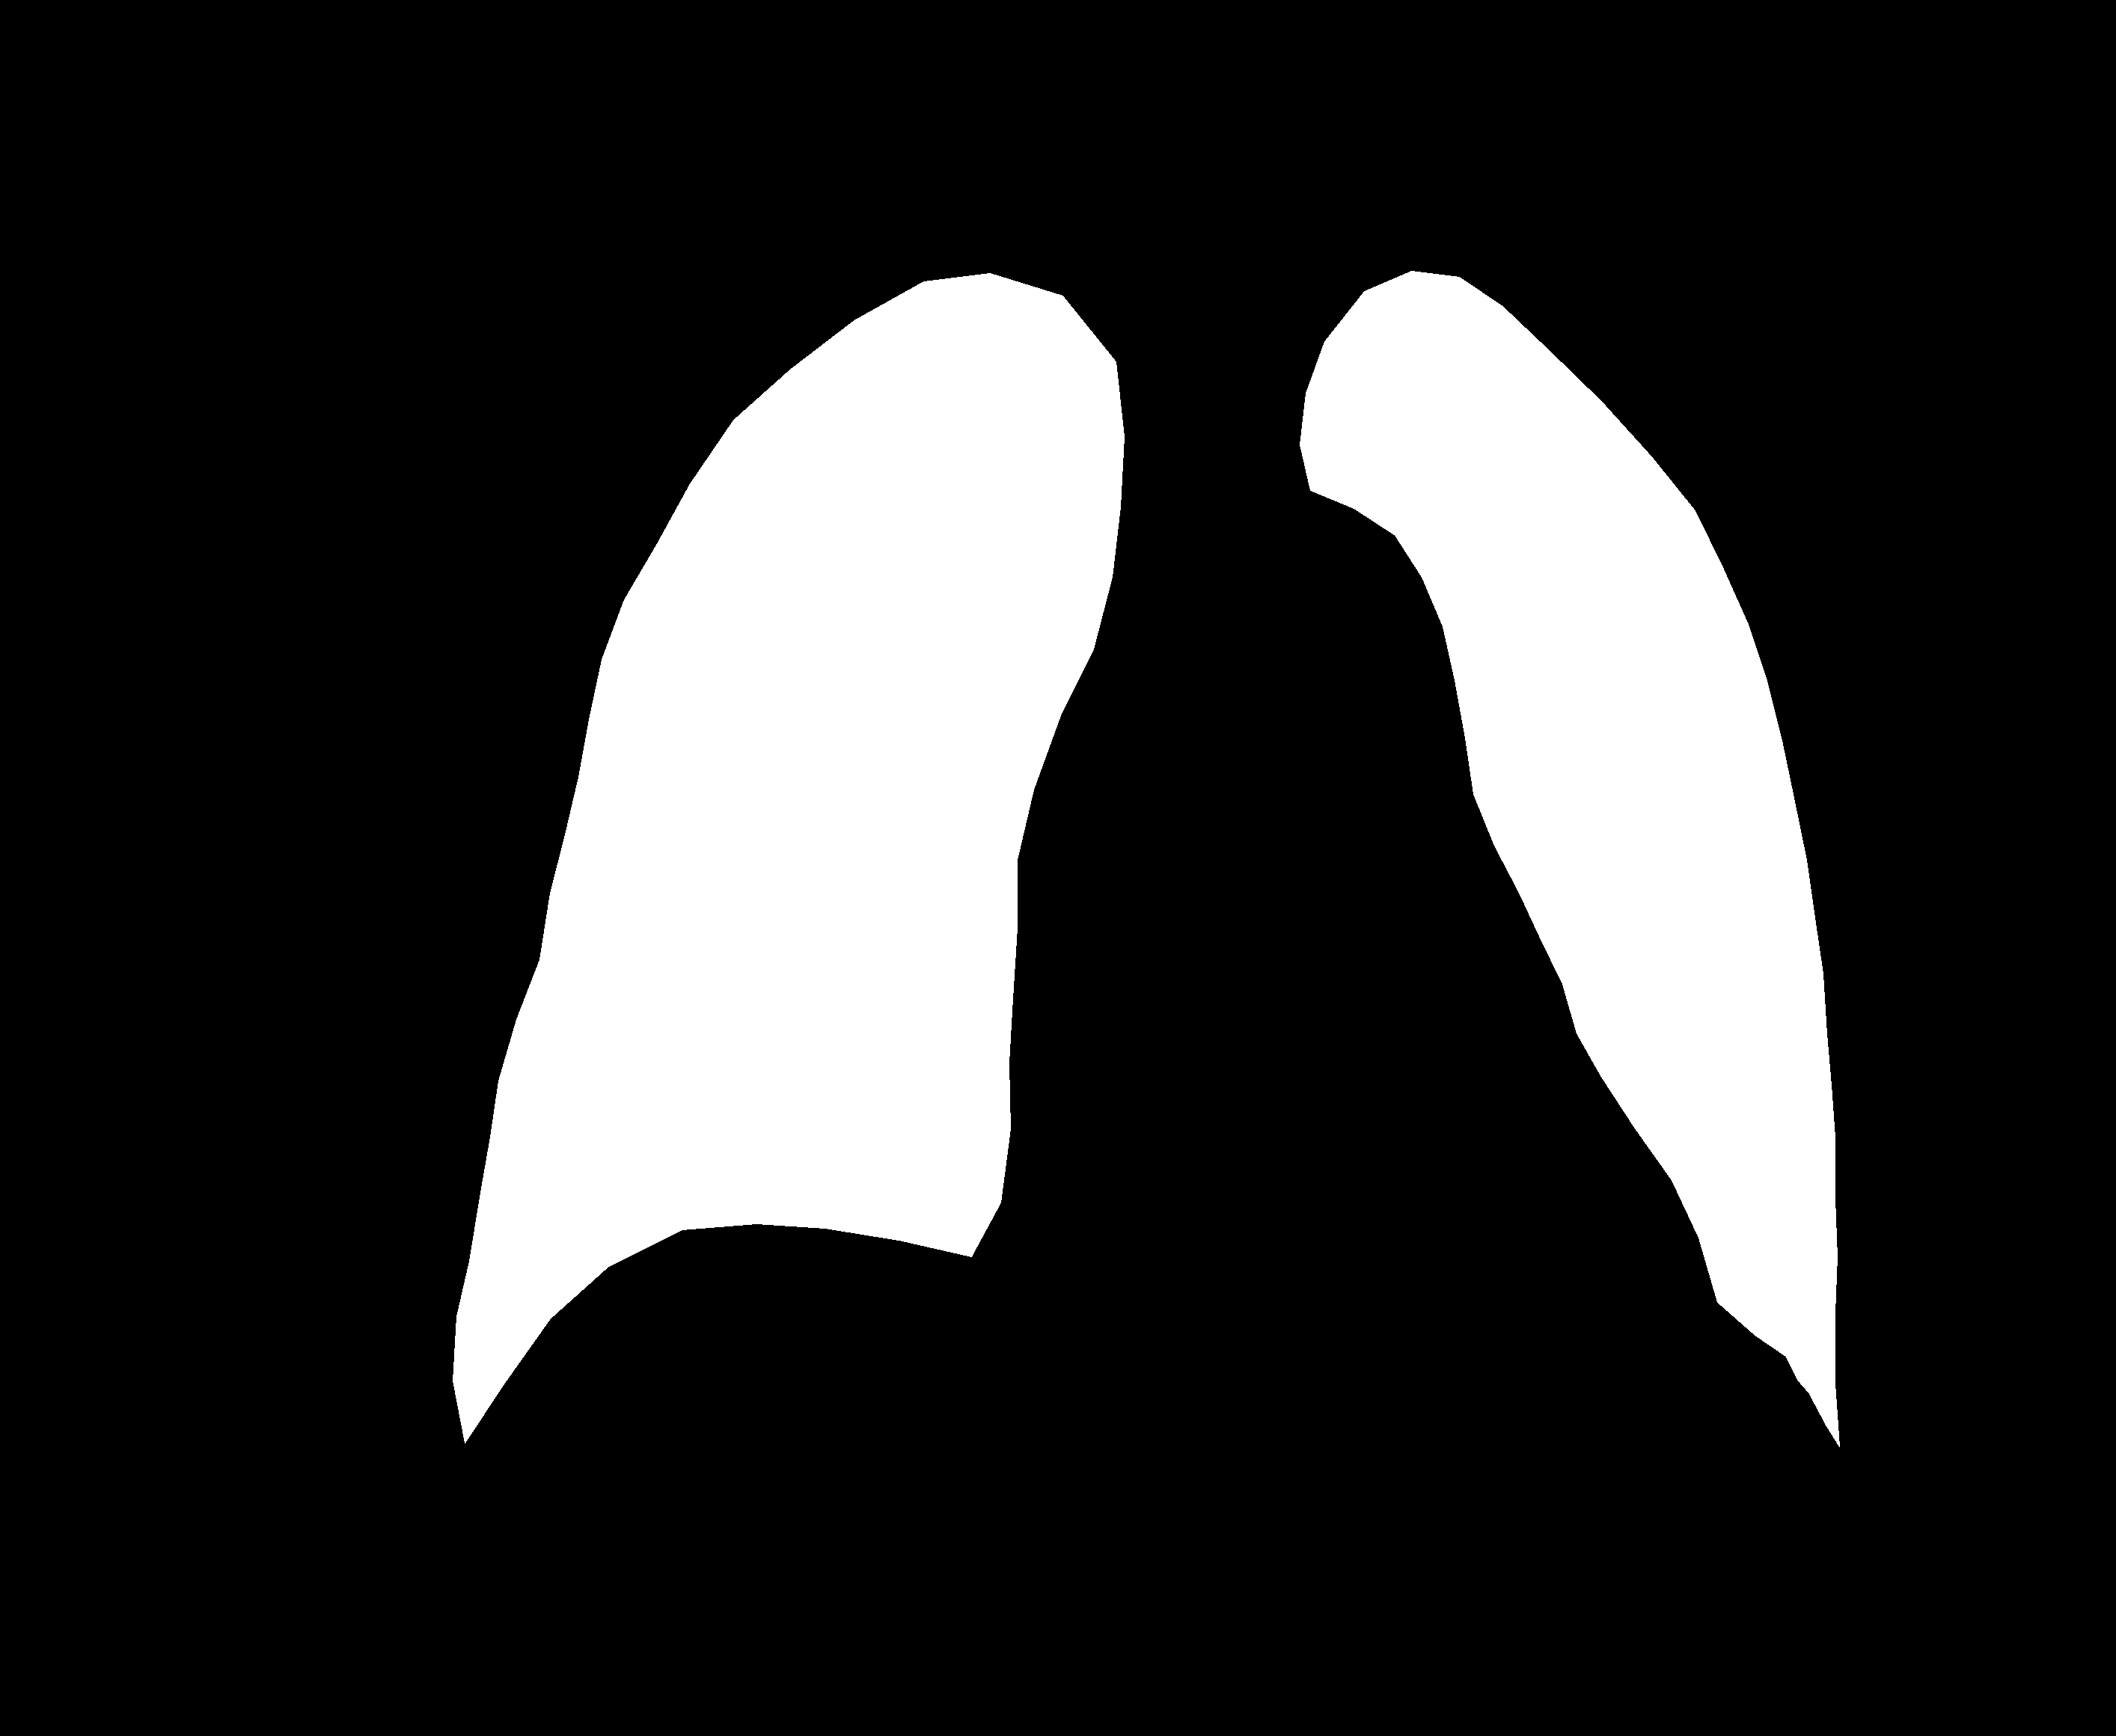

In [35]:
import numpy as np
from PIL import Image

def rle_decode(mask_rle, shape):
    '''
    Decodes an RLE encoded list of space separated numbers into a binary mask.
    mask_rle: string that is encoded as RLE
    shape: (height, width) tuple of the array to return
    Returns numpy array: 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

def visualize_mask(mask):
    ''' Converts a binary mask to a PIL image and shows it. '''
    mask_image = Image.fromarray((mask * 255).astype(np.uint8))
    mask_image.show()

# Assuming you know the dimensions from the DataFrame
shape_0 = masks_csv.loc[2, 'Height']
shape_1 = masks_csv.loc[2, 'Width']
shape = (shape_0, shape_1)  # Example shape, replace with actual dimensions if different

# Decoding the RLE for both lungs from a specific row, e.g., the first row
rl_encoded_right = masks_csv.loc[2, 'Right Lung']
rl_encoded_left = masks_csv.loc[2, 'Left Lung']

mask_right = rle_decode(rl_encoded_right, shape)
mask_left = rle_decode(rl_encoded_left, shape)

# Optional: Combine masks into one image for overlay visualization
combined_mask = np.maximum(mask_right, mask_left)
visualize_mask(combined_mask)


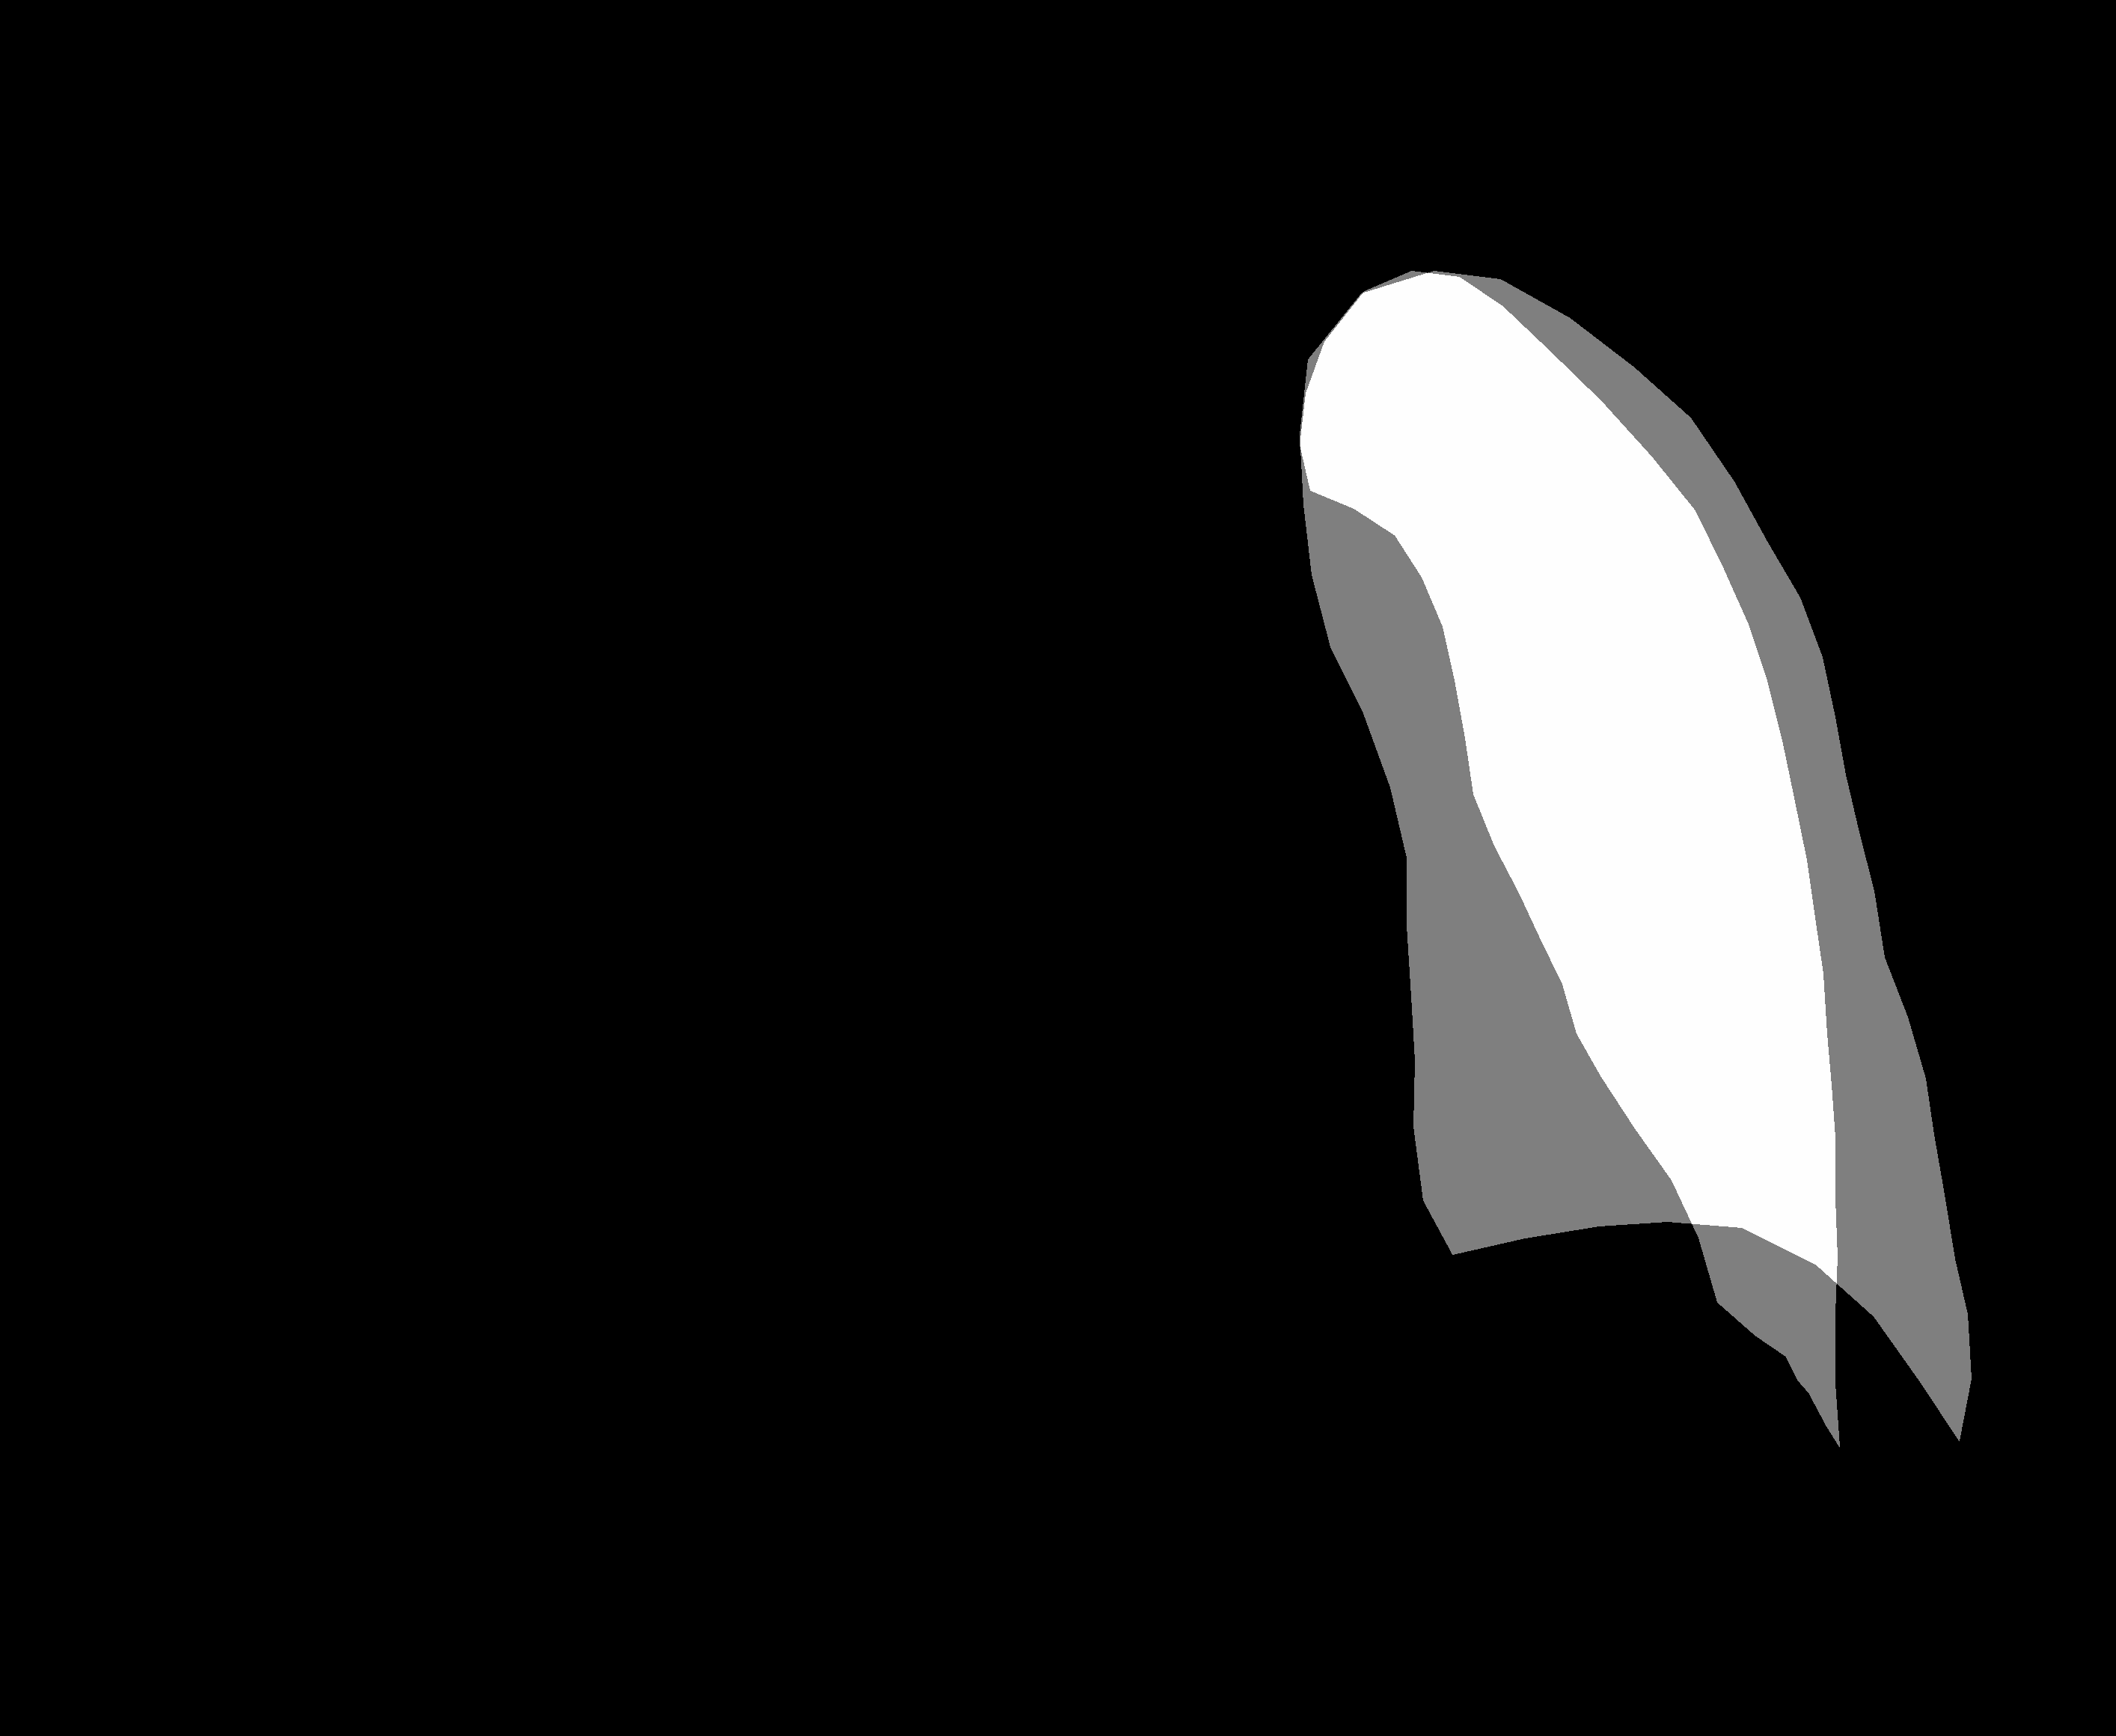

Normalized Overlap Count: 0.43454843702845575


In [36]:
# FOR ASSYMETRY ONCE WE HAVE THE MASKS ON TOP OF THE IMAGES

import numpy as np
from PIL import Image, ImageDraw

def find_bounds(mask):
    """Find the bounds of the nonzero areas in the mask."""
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    ymin, ymax = np.where(rows)[0][[0, -1]]
    xmin, xmax = np.where(cols)[0][[0, -1]]
    return xmin, ymin, xmax, ymax

def process_lungs(mask_right, mask_left):
    # Find bounds for rectangles around each lung
    rxmin, rymin, rxmax, rymax = find_bounds(mask_right)
    lxmin, lymin, lxmax, lymax = find_bounds(mask_left)

    # Flip the right lung horizontally
    right_lung_region = mask_right[rymin:rymax+1, rxmin:rxmax+1]
    flipped_right_lung = np.fliplr(right_lung_region)

    # Overlay the flipped right lung onto the left lung
    # Ensure overlay within the bounds of mask_left
    height, width = flipped_right_lung.shape
    overlay_height = min(height, mask_left.shape[0] - lymin)
    overlay_width = min(width, mask_left.shape[1] - lxmin)
    
    overlay_mask = np.zeros_like(mask_left)
    overlay_mask[lymin:lymin+overlay_height, lxmin:lxmin+overlay_width] = flipped_right_lung[:overlay_height, :overlay_width]

    # Sum the left lung and the overlay
    combined_mask = mask_left + overlay_mask

    # Calculate counts
    non_overlapping_count = np.sum(combined_mask == 1)
    total_covered_count = np.sum(combined_mask >= 1)  # This includes both 1s and 2s

    # Normalize the non-overlapping count
    normalized_non_overlap = non_overlapping_count / total_covered_count if total_covered_count > 0 else 0

    return combined_mask, normalized_non_overlap

# Assuming mask_right and mask_left are already defined:
# Example use:
combined_image, normalized_non_overlap = process_lungs(mask_right, mask_left)

# To visualize the combined image if necessary
image = Image.fromarray((combined_image * 127).astype(np.uint8))  # Scale for visibility: 0, 127, 254
image.show()

print("Normalized Overlap Count:", normalized_non_overlap)




In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image and convert it to grayscale."""
    return Image.open(image_path).convert('L')

def apply_and_visualize_both_lungs(image_path, mask_right, mask_left, title='Lung Overlay'):
    """Apply the binary masks for both lungs to the image and visualize."""
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    # Resize right lung mask if necessary
    if mask_right.shape != image_array.shape:
        mask_image_right = Image.fromarray(mask_right * 255)
        mask_resized_right = mask_image_right.resize(image.size, Image.NEAREST)
        mask_right = np.array(mask_resized_right) / 255

    # Resize left lung mask if necessary
    if mask_left.shape != image_array.shape:
        mask_image_left = Image.fromarray(mask_left * 255)
        mask_resized_left = mask_image_left.resize(image.size, Image.NEAREST)
        mask_left = np.array(mask_resized_left) / 255

    # Combine masks to ensure all lung areas are included
    combined_mask = np.maximum(mask_right, mask_left)

    # # Overlay the mask
    # fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    # ax[0].imshow(image_array, cmap='gray')
    # ax[0].set_title('Original Image')
    # ax[0].axis('off')

    overlay_image = np.zeros_like(image_array)  # Initialize with black
    overlay_image[combined_mask == 1] = image_array[combined_mask == 1]  # Apply mask to image

    # ax[1].imshow(overlay_image, cmap='gray')
    # ax[1].set_title(title)
    # ax[1].axis('off')

    # Show combined mask as well
    # ax[2].imshow(combined_mask, cmap='gray')
    # ax[2].set_title('Combined Mask')
    # ax[2].axis('off')

    # plt.show()

    return overlay_image

# Path to the image and masks
img_id = "train/patient40255/study3/view1_frontal.jpg"  #same as 'Path' in masks_csv
img_dir = "CheXpert-v1.0-small/"
image_path = "/home/data_shares/purrlab/CheXpert/" + img_dir + '/' + img_id

# Load the image and masks
image = load_image(image_path)

apply_and_visualize_both_lungs(image_path, mask_right, mask_left, 'Lung Overlay')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def resize_mask(mask, new_size):
    """Resize a mask array to the specified size using nearest neighbor interpolation."""
    if mask.shape != new_size[::-1]:  # Check if mask needs resizing
        mask_image = Image.fromarray((mask * 255).astype(np.uint8))  # Convert binary mask to PIL image
        resized_mask_image = mask_image.resize(new_size, Image.NEAREST)
        resized_mask = np.array(resized_mask_image) / 255  # Convert back to binary
        return resized_mask
    return mask

def calculate_average_intensity(image_array, mask):
    """Calculate the average intensity in the area covered by the mask."""
    masked_pixels = image_array[mask == 1]  # Apply mask to extract relevant pixels
    return np.mean(masked_pixels) if masked_pixels.size > 0 else 0

def visualize_mask_with_intensity(image_path, mask_right, mask_left):
    """Visualize the lung regions with annotations for average intensity."""
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    # Resize masks and calculate average intensities
    mask_right_resized = resize_mask(mask_right, image.size)
    mask_left_resized = resize_mask(mask_left, image.size)

    right_intensity = calculate_average_intensity(image_array, mask_right_resized)
    left_intensity = calculate_average_intensity(image_array, mask_left_resized)

    return right_intensity, left_intensity

# Assuming you have loaded mask_right and mask_left, and defined image_path
right_intensity, left_intensity = visualize_mask_with_intensity(image_path, mask_right, mask_left)

In [40]:
left_intensity

122.73183279742766

In [34]:
upd_train_data['Path'][0]

'CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg'

In [41]:
def process_all_images(upd_train_data, masks_csv, base_dir="/home/data_shares/purrlab/CheXpert/"):
    """Process all images in upd_train_data using mask details from masks_csv."""
    # Ensure necessary columns exist
    if 'Right_Lung_Intensity' not in upd_train_data.columns:
        upd_train_data['Right_Lung_Intensity'] = np.nan
    if 'Left_Lung_Intensity' not in upd_train_data.columns:
        upd_train_data['Left_Lung_Intensity'] = np.nan
    if 'Asymmetry' not in upd_train_data.columns:
        upd_train_data['Asymmetry'] = np.nan

    # Define the prefix to remove from upd_train_data paths for correct linking
    prefix = 'CheXpert-v1.0-small/'

    # Iterate over each image entry in upd_train_data
    for index, row in upd_train_data.iterrows():
        # Adjust the path by removing the prefix
        adjusted_path = row['Path'][len(prefix):] if row['Path'].startswith(prefix) else row['Path']

        # Find the corresponding mask entry in masks_csv using the adjusted path
        if adjusted_path in masks_csv['Path'].values:
            mask_data = masks_csv[masks_csv['Path'] == adjusted_path].iloc[0]
            rle_right = mask_data['Right Lung']
            rle_left = mask_data['Left Lung']
            shape = (mask_data['Height'], mask_data['Width'])

            # Decode RLE to masks
            mask_right = rle_decode(rle_right, shape)
            mask_left = rle_decode(rle_left, shape)

            image_path = f"{base_dir}{row['Path']}"
            try:
                image = Image.open(image_path).convert('L')
                image_array = np.array(image)

                # Resize masks to image size and calculate intensities
                mask_right_resized = resize_mask(mask_right, image.size)
                mask_left_resized = resize_mask(mask_left, image.size)

                right_intensity = calculate_average_intensity(image_array, mask_right_resized)
                left_intensity = calculate_average_intensity(image_array, mask_left_resized)

                # Calculate asymmetry using process_lungs
                _, normalized_non_overlap = process_lungs(mask_right_resized, mask_left_resized)

                # Update DataFrame with calculated values
                upd_train_data.at[index, 'Right_Lung_Intensity'] = right_intensity
                upd_train_data.at[index, 'Left_Lung_Intensity'] = left_intensity
                upd_train_data.at[index, 'Asymmetry'] = normalized_non_overlap

            except FileNotFoundError:
                print(f"File not found: {image_path}")
            except Exception as e:
                print(f"Error processing file {image_path}: {e}")
        else:
            print(f"No corresponding mask data found for {adjusted_path}")

    return upd_train_data

# Assuming both upd_train_data and masks_csv are defined and prepared
updated_df = process_all_images(upd_train_data, masks_csv)


No corresponding mask data found for train/patient00002/study1/view2_lateral.jpg
No corresponding mask data found for train/patient00004/study1/view2_lateral.jpg
No corresponding mask data found for train/patient00005/study1/view2_lateral.jpg
No corresponding mask data found for train/patient00005/study2/view2_frontal.jpg
No corresponding mask data found for train/patient00009/study1/view2_lateral.jpg
No corresponding mask data found for train/patient00010/study1/view2_lateral.jpg
No corresponding mask data found for train/patient00011/study13/view2_lateral.jpg
No corresponding mask data found for train/patient00012/study3/view2_lateral.jpg
No corresponding mask data found for train/patient00012/study2/view2_lateral.jpg
No corresponding mask data found for train/patient00012/study1/view2_lateral.jpg
No corresponding mask data found for train/patient00013/study1/view2_lateral.jpg
No corresponding mask data found for train/patient00014/study1/view2_lateral.jpg
No corresponding mask data 

In [42]:
updated_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,corner_193,corner_194,corner_195,corner_196,corner_197,corner_198,corner_199,Right_Lung_Intensity,Left_Lung_Intensity,Asymmetry
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,45.543514,43.238125,0.384764
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,0,0,0,0,0,0,0,110.128293,96.570501,0.596201
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,144.185999,141.597298,0.482320
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,74.035784,82.150730,0.417489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,0,0,0,0,0,0,0,62.346834,91.663944,0.368473
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,0,0,0,0,0,0,0,74.248186,95.215829,0.319442
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,98.299781,143.113680,0.557926
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,...,0,0,0,0,0,0,0,177.631882,98.083139,0.704381


In [43]:
updated_df.to_csv('final_train_data.csv', index=False)